# Sitzung 1

Diese Skripte sind ausschließlich als Zusatz-Material gedacht. Speziell für diejenigen unter Euch, die einen Einblick in das Programmieren gewinnen wollen. Wenn Du es also leid bist repetitive Tätigkeiten auszuführen und das lieber einer Maschine überlassen willst, bist Du hier genau richtig. 

<span style="color:red"> Die Codes sind nicht für die Klausur relevant, genau genommen haben sie mit dem Lehrstuhl für Statistik **rein gar nichts** zu tun. </span>

## Aufgabe 5-1: Kinder

Als erstes überprüfen wir, wie viele Kombinationen maximal möglich sind. Da uns die Reihenfolge nicht interessiert, verwenden wir den Binomialkoeffizienten. Glücklicherweise ist dieser bereits in dem `scipy` Modul implementiert. Um die Funktion benutzen zu können, müssen wir sie zunächst in unsere Sitzung importieren.

In [54]:
from scipy.special import binom

# Anzahl Möglichkeiten: Binomialkoeffizient
max_comb = binom(6, 3)
print(max_comb)

{8: [{'P1', 'P2', 'P3'}, {'P1', 'P4', 'P6'}, {'P1', 'P3', 'P5'}],
 5: [{'P2', 'P5', 'P6'}, {'P2', 'P4', 'P5'}],
 4: [{'P2', 'P3', 'P5'}, {'P4', 'P5', 'P6'}, {'P2', 'P4', 'P6'}],
 2: [{'P3', 'P4', 'P6'}],
 3: [{'P3', 'P5', 'P6'},
  {'P2', 'P3', 'P6'},
  {'P3', 'P4', 'P5'},
  {'P2', 'P3', 'P4'}],
 9: [{'P1', 'P2', 'P4'},
  {'P1', 'P2', 'P6'},
  {'P1', 'P4', 'P5'},
  {'P1', 'P5', 'P6'}],
 7: [{'P1', 'P3', 'P6'}, {'P1', 'P3', 'P4'}],
 10: [{'P1', 'P2', 'P5'}]}

Um eine Lösung für unser Problem zu finden, müssen wir eine Formulierung finden, die mit den eingebauten Datenstrukturen kompatibel ist. Die einfachste Form mehrere Objekte zu speichern, ist eine Liste. Listen werden in Python mit eckigen Klammern deklariert. Will man hingegen Werte speichern, die auf andere Werte verweisen, bieten sich `dictionaries` an. Man sagt auch, `dictionaries` seien sogenannte **lookup-tables**. Wir werden ein solches `dictionary` verwenden, um schnell von einer Person auf die Anzahl ihrer Kinder zugreifen zu können.

In [ ]:
# Listen für Personen und Anzahl Kinder
per = ["P1", "P2", "P3", "P4", "P5", "P6"]
chil = [6, 2, 0, 1, 2, 1]
# Dictionary, das den Personen, die Anzahl an Kindern zuordnet.
per2chil = dict(zip(per, chil))

Vorgehensweise:
+ Zunächst speichern wir ein neues, leeres `dictionary` $X$ ab, das wir anschließend befüllen.
+ Wir ziehen 3 Personen zufällig aus `per` und notieren die Gesamtanzahl $x$ an Kindern.
+ Wenn wir den Wert für $x$ zum ersten Mal beobachten, fügen wir die zugehörige Kombination zu unserem `dictionary` hinzu.
+ Wenn der Wert für $x$ bereits im dictionary auftaucht, prüfen wir ob die Kombination die zu diesem $x$ führte, bereits im `dictionary` enthalten ist - wenn nicht, fügen wir sie hinzu.

In [ ]:
# Ereignismenge und Kombinationen
import random

X = {}

while sum([len(i) for i in X.values()]) < 20:
    samp = set(random.sample(per, 3))
    x = sum([per2chil[i] for i in samp]) 

    if x not in X:
        X[x] = [samp]
    elif samp not in X[x]:
        X[x].append(samp)

# Es ist nicht möglich, dass X den Wert 6 annimmt.
# Wir fügen den Wert mit  Darstellung
X[6] = []

X

### Wahrscheinlichkeitsfunktion

In [55]:
import pandas as pd

Fx = [(key, len(value)/max_comb) for key, value in X.items()]
X_prob = pd.DataFrame(Fx, columns=["x", "P(x)"]).sort_values("x").set_index("x")
X_prob.T

x,2,3,4,5,7,8,9,10
P(x),0.05,0.2,0.15,0.1,0.1,0.15,0.2,0.05


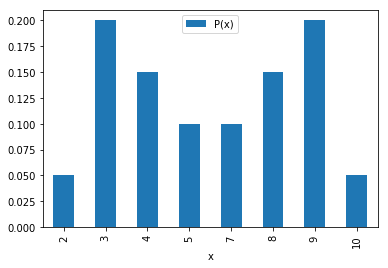

In [56]:
# Dieser Befehl bewirkt, dass plots automatisch dargestellt werden
%matplotlib inline

X_prob.plot(kind="bar")

### Verteilungsfunktion

In [58]:
X_prob["F(X <= x)"] = X_prob["P(x)"].values.cumsum()
X_prob.T

x,2,3,4,5,7,8,9,10
P(x),0.05,0.20,0.15,0.1,0.1,0.15,0.20,0.05
F(X <= x),0.05,0.25,0.40,0.5,0.6,0.75,0.95,1.00


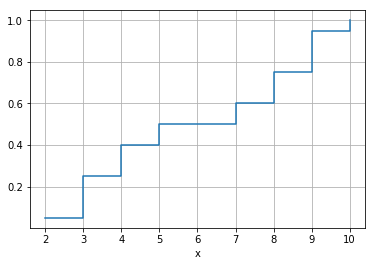

In [62]:
X_prob["F(X <= x)"].plot(drawstyle="steps-post", grid=True)